### Setting Up the Workspace

In [3]:
import os 
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import PIL.Image
import cv2
from tensorflow.keras.utils import plot_model
os.chdir('..')
from ml_utils.GAN_utils import *
%load_ext autoreload
%autoreload 2

### Developing the GAN Model

In [6]:
# Defining the image shape
image_shape = (256,256,3)

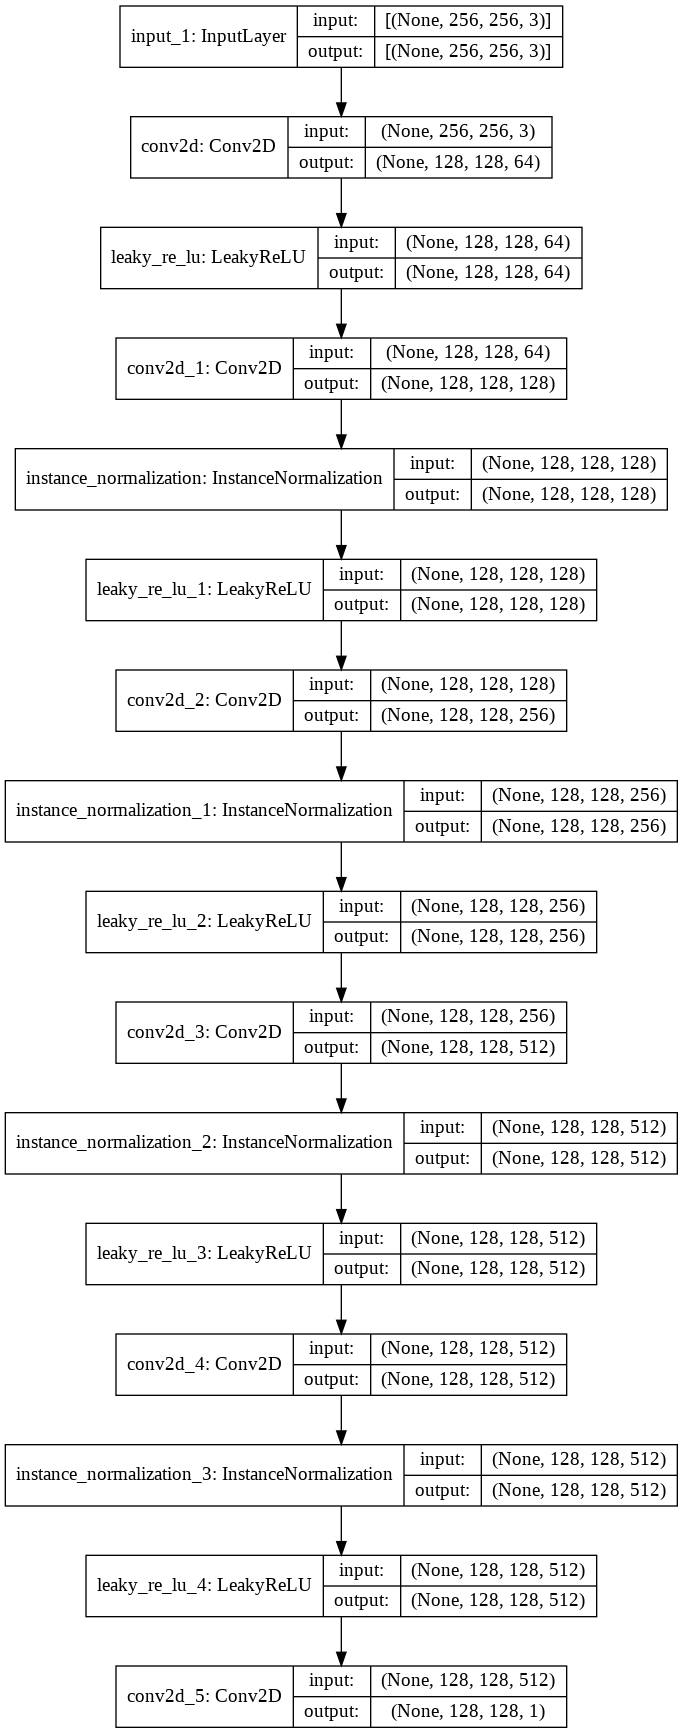

In [7]:
# Defining the Discriminator model for the PatchGAN
model_d = define_discriminator(image_shape)
# summarize the model
# model_d.summary()
# plot the model
plot_model(model_d, to_file='./data/model_structure/discriminator_model_plot.png', show_shapes=True, show_layer_names=True)

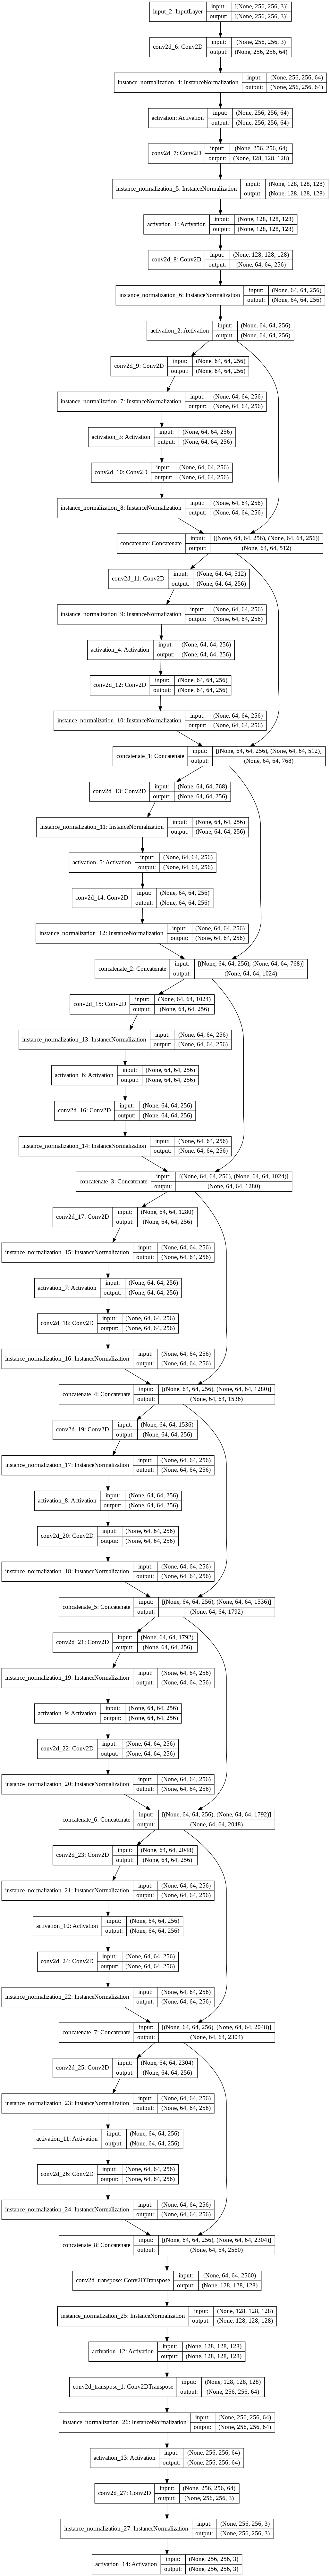

In [8]:
# Defining the Generator model for the PatchGAN
model_g = define_generator()
# summarize the model
# model_g.summary()
# plot the model
plot_model(model_g, to_file='data/model_structure/generator_model_plot.png', show_shapes=True, show_layer_names=True)

In [9]:
# generator: A -> B
g_model_AtoB = define_generator(image_shape)
# generator: B -> A
g_model_BtoA = define_generator(image_shape)
# discriminator: A -> [real/fake]
d_model_A = define_discriminator(image_shape)
# discriminator: B -> [real/fake]
d_model_B = define_discriminator(image_shape)
# composite: A -> B -> [real/fake, A]
c_model_AtoB = define_composite_model(g_model_AtoB, d_model_B, g_model_BtoA, image_shape)
# composite: B -> A -> [real/fake, B]
c_model_BtoA = define_composite_model(g_model_BtoA, d_model_A, g_model_AtoB, image_shape)

In [10]:
# Loading daytime images as trainA, nighttime images as train B (numpy lists)
path_A = 'data/day/'
path_B = 'data/night/'
images_A = os.listdir(path_A)
images_B = os.listdir(path_B)
trainA=[]
trainB=[]
for i in range(len(images_A)):
    image_label = images_A[i]
    image = PIL.Image.open(str(path_A)+str(image_label))
    image = np.array(image)
    image = np.true_divide(image,255)
    image = cv2.resize(image,(256,256))
    trainA.append(image)
trainA = np.array(trainA)
i=0
for i in range(len(images_B)):
    image_label_B = images_B[i]
    image_B = PIL.Image.open(str(path_B)+str(image_label_B))
    image_B = np.array(image_B)
    image_B = np.true_divide(image_B,255)
    image_B = cv2.resize(image_B,(256,256))
    trainB.append(image_B)
trainB = np.array(trainB)

print(len(trainA))
print(len(trainB))

244
213


In [11]:
# Training the model
[g_day2night,g_night2day,c_day2night,c_night2day] = train(d_model_A,d_model_B,g_model_AtoB,g_model_BtoA,c_model_AtoB,c_model_BtoA,trainA,trainB)

2440
>1, dA[1.848,0.836] dB[0.837,0.578] g[8.522,13.488]
>2, dA[1.659,0.456] dB[0.524,0.420] g[8.080,11.895]
>3, dA[1.446,0.373] dB[0.404,0.341] g[6.061,8.783]
>4, dA[1.229,0.181] dB[0.231,0.273] g[9.507,11.452]
>5, dA[0.963,0.168] dB[0.264,0.246] g[6.543,8.556]
>6, dA[0.880,0.099] dB[0.272,0.221] g[6.499,7.639]
>7, dA[0.739,0.061] dB[0.258,0.197] g[6.678,7.711]
>8, dA[0.813,0.039] dB[0.210,0.181] g[6.997,7.738]
>9, dA[0.818,0.039] dB[0.208,0.168] g[6.935,7.317]
>10, dA[0.597,0.029] dB[0.214,0.143] g[5.051,5.569]
>11, dA[0.674,0.036] dB[0.207,0.123] g[6.946,7.115]
>12, dA[0.426,0.042] dB[0.222,0.197] g[5.720,5.685]
>13, dA[0.465,0.046] dB[0.264,0.189] g[7.741,7.664]
>14, dA[0.324,0.060] dB[0.178,0.178] g[6.428,6.211]
>15, dA[0.425,0.154] dB[0.174,0.170] g[5.856,5.705]
>16, dA[0.193,0.079] dB[0.163,0.144] g[7.286,7.843]
>17, dA[0.353,0.064] dB[0.327,0.154] g[7.907,7.785]
>18, dA[0.237,0.073] dB[0.180,0.143] g[4.816,4.734]
>19, dA[0.248,0.053] dB[0.190,0.215] g[5.251,5.703]
>20, dA[0.248

Original Day Image is=



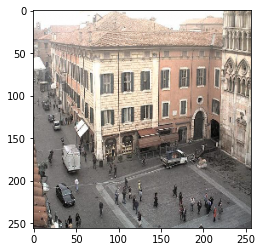

Fake Night image is=



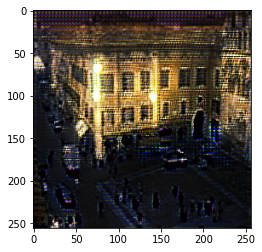

Original Night Image is=



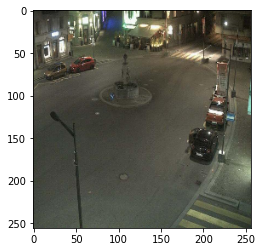

Fake Day image is=



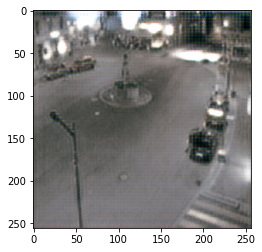

Original Day Image is=



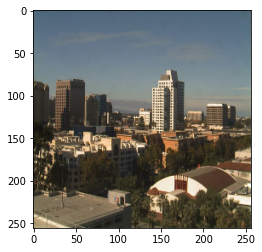

Fake Night image is=



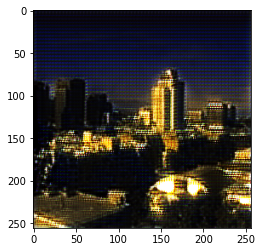

Original Night Image is=



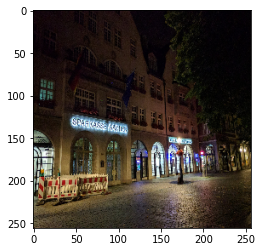

Fake Day image is=



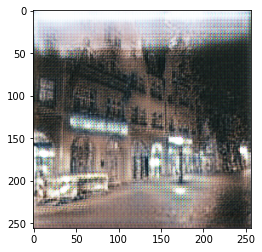

In [13]:
test(g_model_AtoB, g_model_BtoA, c_model_AtoB, c_model_BtoA, trainA,trainB)

In [15]:
g_model_AtoB.save('models/g_model_AtoB')
g_model_BtoA.save('models/g_model_BtoA')
c_model_AtoB.save('models/c_model_AtoB')
c_model_BtoA.save('models/c_model_BtoA')

INFO:tensorflow:Assets written to: models/g_model_AtoB/assets


### END